In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('Üretim Tahmin.xlsx')

In [3]:
data.head()

,Üretim,Sıcaklık,Hava Durumu
0,1.10640,17,0
1,1.08220,19,0
2,1.38600,16,0
3,1.40175,18,0
4,0.99780,14,0


C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


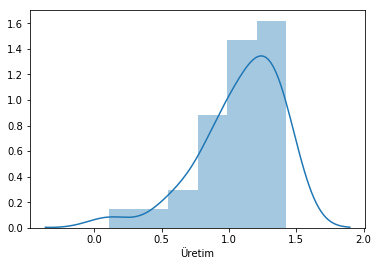

In [4]:
sns.distplot(data['Üretim'])

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


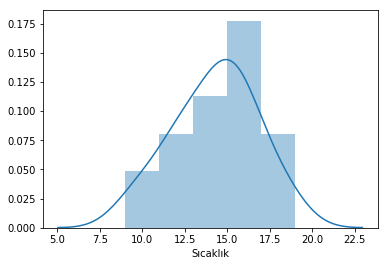

In [5]:
sns.distplot(data['Sıcaklık'])

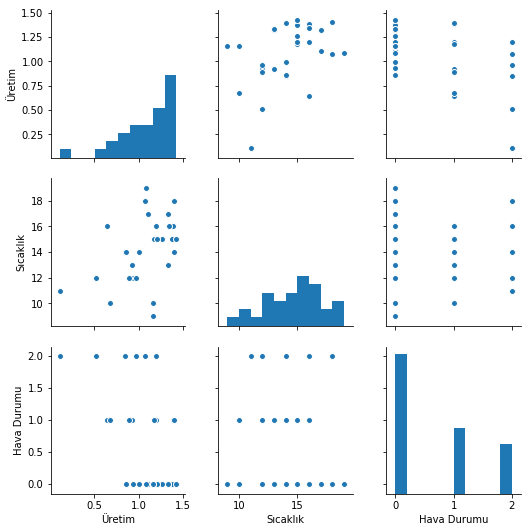

In [6]:
sns.pairplot(data)

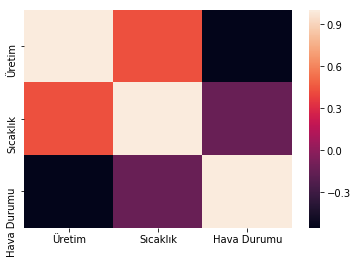

In [8]:
sns.heatmap(data.corr())

In [9]:
data.corr()

,Üretim,Sıcaklık,Hava Durumu
Üretim,1.000000,0.432543,-0.553473
Sıcaklık,0.432543,1.000000,-0.137704
Hava Durumu,-0.553473,-0.137704,1.000000


Positive correlation between Sıcaklık and Üretim. Negative correlation between Hava durumu and Üretim

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


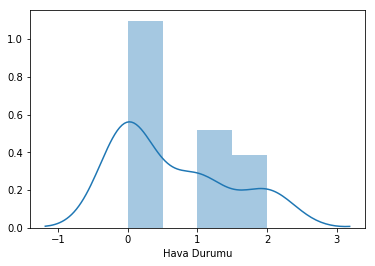

In [10]:
sns.distplot(data['Hava Durumu'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.linear_model import LinearRegression

In [17]:
y=data['Üretim']
X=data[['Sıcaklık','Hava Durumu']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(lm.intercept_)

0.7162997003687768


In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Sıcaklık,0.032962
Hava Durumu,-0.183073


In [23]:
Predictions=lm.predict(X_test)

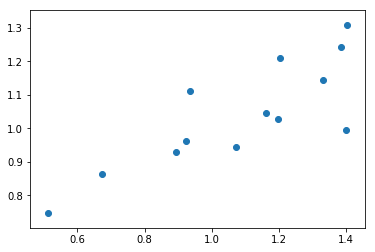

In [25]:
plt.scatter(y_test,Predictions)

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


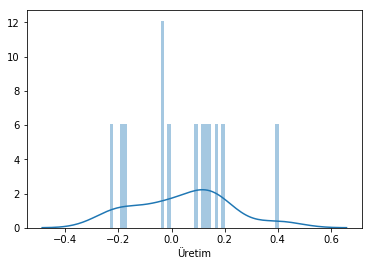

In [27]:
sns.distplot((y_test-Predictions),bins=50);

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))

MAE: 0.14745441291191907
MSE: 0.03145748794532633
RMSE: 0.17736258891132123


In [37]:
data2=pd.read_excel('Tahmin.xlsx')

In [38]:
prediction2=lm.predict(data2)

In [39]:
prediction2

array([1.27665941, 1.34258409, 1.24369708, 1.30962175, 1.17777241])